# Aggregation plots sum

In [1]:
cdt = 10000

In [2]:
%ls

0_analysis_prepare.ipynb            make_fibril_2000_13mM_300K_3/
1_analysis_aggregation.ipynb        make_fibril_2000_13mM_302K_1/
1_analysis_chain_label.ipynb        make_fibril_2000_13mM_304K_1/
2_analysis_aggregation_plots.ipynb  make_fibril_2000_13mM_304K_analysis_test/
all_plots_10000.png                 make_fibril_2000_13mM_306K_1/
commons@                            make_fibril_2000_13mM_308K_1/
make_fibril_2000_10mM_300K_1/       make_fibril_2000_13mM_310K_1/
make_fibril_2000_10mM_300K_2/       make_fibril_2000_7mM_300K_1/
make_fibril_2000_10mM_300K_3/       make_fibril_2000_7mM_300K_2/
make_fibril_2000_13mM_300K_1/       make_fibril_2000_7mM_300K_3/
make_fibril_2000_13mM_300K_2/


In [3]:
import os, os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

def make_plots_path_list():
    directories_with_plots = []
    # This checks all the subdirectories in the current directory
    directory_content = os.listdir('.')
    for item in directory_content:
        if os.path.isdir(item):
            if os.path.exists(f'{item}/analysis/'):
                # Check the content of analysis folder
                subdir_content = os.listdir(f'{item}/analysis/')
                subdir_content = list(filter(lambda k: '.dat' in k, subdir_content))
                subdir_content = list(filter(lambda k: f'{cdt}' in k, subdir_content))
                if len(subdir_content) != 0:
                    # If the analysis directory contains txt files with plots the directory is added for reading
                    directories_with_plots.append(item)
    directories_with_plots.sort()
    return directories_with_plots

def import_matrix(plots_list):
    # Makes a dictionary with DF as values
    full_matrix_dict = {}
    for directory in plots_list:
        # Read the matrix and set dictionary as directory:dataframe
        full_matrix_dict[directory] = pd.read_csv(f'{directory}/analysis/matrix-dt{cdt}.dat', sep = '\\s+', header = None)
    
    return full_matrix_dict

def make_plots(matrix_dict):
    #print(matrix_dict)
    plot_matrix_dict, plot_norm_histogram_dict, plot_histogram_dict = {}, {}, {}
    for simulation, matrix in matrix_dict.items():

        # Changing the index so now it is in picoseconds
        #matrix[0] = matrix[0].apply(lambda x:x*10)
        #matrix = matrix.set_index([0])

        ### Data handling
        #### Defining the Maxclust and the number of frames
        clustsize = list(range(0, len(matrix.columns), 1))
        frames = list(range(0, len(matrix.index), 1))
        fibril = list(range(2, len(matrix.columns)))
        #not_fibril = list(range(3, 10, 1))


        #### Multiply the columns for its clustsize
        size = pd.Series(clustsize)
        matrix = matrix.mul(size, axis = 1)

        #### Replace 0 with n.an
        matrix[matrix == 0] = np.nan

        #### I don't care about monomers
        matrix = matrix.drop([0, 1], axis = 1)

        ### Make the histogram to compare with lab results
        # Set the not-fibril to 0 and have a sort of lag time 
        histo_norm = matrix.copy()
        histo_norm[[2, 3, 4, 5, 6, 7, 8, 9, 10]] = 0
        histo_norm = histo_norm[fibril].sum(axis=1)

        # This one is the complete one
        histogram = matrix[fibril].sum(axis=1)

        # Matrix transpose
        matrix = matrix.T

        # Store everything into dictionaries
        plot_matrix_dict[simulation] = matrix
        plot_norm_histogram_dict[simulation] = histo_norm
        plot_histogram_dict[simulation] = histogram

    return plot_matrix_dict, plot_norm_histogram_dict, plot_histogram_dict



In [4]:
path_list = make_plots_path_list()
matrix_dict = import_matrix(path_list)
plot_matrix_dict, plot_norm_histogram_dict, plot_histogram_dict = make_plots(matrix_dict)


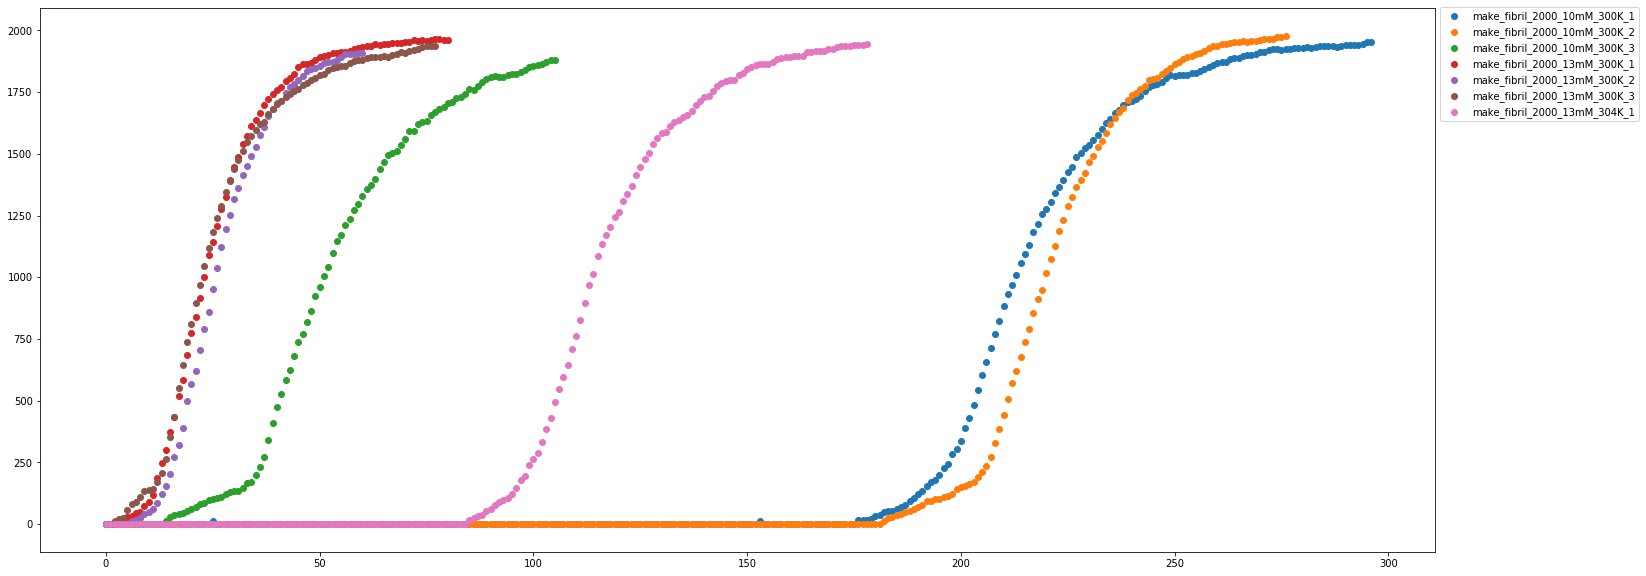

In [8]:
#prova = ListedColormap(['darkorange', 'gold', 'lawngreen', 'lightseagreen'])
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111)

for simulation, histo in plot_norm_histogram_dict.items():
    frames = list(range(0, len(histo.index), 1))
    ax.scatter(frames, histo, cmap = 'winter', rasterized = True, label = simulation)

plt.legend(loc='right', bbox_to_anchor = (1.15, 0.897))
    #ax[1, 1].ylabel('Clustsize x MW')
    #ax[1, 1].xlabel('Time (ns)')
    #ax[1, 1].suptitle(f'{simulation}')
    #ax.savefig(f'{concentration}mM_matrix_dt-{cdt}.png', dpi = 800)
    #ax[1, 1].show()
fig.savefig(f'all_plots_{cdt}.png', dpi= 800)